In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Nunito'
plt.rcParams['font.size'] = 10

In [2]:
# color_code = ['#80ADF7','#EFBA50']
font_name = 'Nunito'
font_size = 10
font_size_title = 12
font_weight = 'bold'
orange_color = '#EFBA50'
blue_color = '#80ADF7'
grey_color = '#B0BCC8'
green_color = '#9EEDE0'
darkgreen_color = '#3CDBC0'
red_color = '#FD7284'
brown_color = '#D8B475'
lightred_color = '#FF9592'
# color_code2 = [blue_color, grey_color]

background_color = "#F1F1F1"
border_color = "#B0BCC8"
text_align = 'center'
border_width ="0.5px"
border_style = 'solid'

body_design = { 'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align}
body_design2 = {'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align,'width':'70px'}
body_design3 = { 'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align,'width':'120px'}

border_design = {'selector': 'th', 'props': [('background-color' , background_color),('border-style' ,border_style),('font-family',font_name),('font-size',font_size),('border-width',border_width),('text-align',text_align),('border-color',border_color)]}
bar_width=0.5

In [3]:
%run path_changer.py

In [4]:
scenario_1_df = pd.read_csv(file_path + 'scenario_1_df.csv',low_memory=False)
scenario_1_df = scenario_1_df[scenario_1_df['trackrx_last_status'] == 'B']

scenario_2_df = pd.read_csv(file_path + 'scenario_2_df.csv',low_memory=False)
scenario_2_df = scenario_2_df[scenario_2_df['trackrx_last_status'] == 'B']


scenario_3_df = pd.read_csv(file_path + 'scenario_3_df.csv',low_memory=False)
scenario_3_df = scenario_3_df[scenario_3_df['trackrx_last_status'] == 'B']


scenario_4_df = pd.read_csv(file_path + 'scenario_4_df.csv',low_memory=False)
scenario_4_df = scenario_4_df[scenario_4_df['trackrx_last_status'] == 'B']

In [5]:
'rx_revenue' in scenario_1_df.columns

False

In [6]:
scenario_1_df['TOTALRXAMOUNT'] = scenario_1_df['TOTALRXAMOUNT'].astype(str)
scenario_2_df['TOTALRXAMOUNT'] = scenario_2_df['TOTALRXAMOUNT'].astype(str)
scenario_3_df['TOTALRXAMOUNT'] = scenario_3_df['TOTALRXAMOUNT'].astype(str)
scenario_4_df['TOTALRXAMOUNT'] = scenario_4_df['TOTALRXAMOUNT'].astype(str)


In [7]:
# scenario_1_df['TOTALRXAMOUNT'] = scenario_1_df['TOTALRXAMOUNT'].astype(str)
scenario_1_df['rx_revenue'] = scenario_1_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_2_df['rx_revenue'] = scenario_2_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_3_df['rx_revenue'] = scenario_3_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_4_df['rx_revenue'] = scenario_4_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)

In [8]:
scenario_1_df_tile = pd.pivot_table(scenario_1_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_2_df_tile = pd.pivot_table(scenario_2_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_3_df_tile = pd.pivot_table(scenario_3_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_4_df_tile = pd.pivot_table(scenario_4_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()

scenario_1_df_tile = scenario_1_df_tile.append(scenario_1_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_2_df_tile = scenario_2_df_tile.append(scenario_2_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_3_df_tile = scenario_3_df_tile.append(scenario_3_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_4_df_tile = scenario_4_df_tile.append(scenario_4_df_tile.sum(numeric_only=True), ignore_index=True)

scenario_1_df_tile['Rev/Rx'] = round(scenario_1_df_tile['rx_revenue']/scenario_1_df_tile['rx_code_key_location'],0)
scenario_2_df_tile['Rev/Rx'] = round(scenario_2_df_tile['rx_revenue']/scenario_2_df_tile['rx_code_key_location'],0)
scenario_3_df_tile['Rev/Rx'] = round(scenario_3_df_tile['rx_revenue']/scenario_3_df_tile['rx_code_key_location'],0)
scenario_4_df_tile['Rev/Rx'] = round(scenario_4_df_tile['rx_revenue']/scenario_4_df_tile['rx_code_key_location'],0)


In [9]:
scenario_1_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_2_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_3_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_4_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location,rx_revenue,Rev/Rx
0,FL-MI,116.0,57160.68,493.0
1,MD-BA,102.0,49536.56,486.0
2,NC-RA,346.0,29590.97,86.0
3,NJ-SO,1473.0,367503.54,249.0
4,NY-BK,1783.0,412049.29,231.0
5,NY-MA,159.0,10498.66,66.0
6,PA-PH,1559.0,276199.79,177.0
7,Total,5538.0,1202539.49,217.0


In [10]:
scenario_1_df_tile.columns = ['pharmacy_loc','rx_code_key_location_1','rx_revenue_1','Rev/Rx_1']
scenario_2_df_tile.columns = ['pharmacy_loc','rx_code_key_location_2','rx_revenue_2','Rev/Rx_2']
scenario_3_df_tile.columns = ['pharmacy_loc','rx_code_key_location_3','rx_revenue_3','Rev/Rx_3']
scenario_4_df_tile.columns = ['pharmacy_loc','rx_code_key_location_4','rx_revenue_4','Rev/Rx_4']
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,116.0,57160.68,493.0
1,MD-BA,102.0,49536.56,486.0
2,NC-RA,346.0,29590.97,86.0
3,NJ-SO,1473.0,367503.54,249.0
4,NY-BK,1783.0,412049.29,231.0
5,NY-MA,159.0,10498.66,66.0
6,PA-PH,1559.0,276199.79,177.0
7,Total,5538.0,1202539.49,217.0


In [11]:
scenario_1_df_tile[['rx_code_key_location_1','rx_revenue_1']] = scenario_1_df_tile[['rx_code_key_location_1','rx_revenue_1']].div(6)
scenario_2_df_tile[['rx_code_key_location_2','rx_revenue_2']] = scenario_2_df_tile[['rx_code_key_location_2','rx_revenue_2']].div(6)
scenario_3_df_tile[['rx_code_key_location_3','rx_revenue_3']] = scenario_3_df_tile[['rx_code_key_location_3','rx_revenue_3']].div(6)
scenario_4_df_tile[['rx_code_key_location_4','rx_revenue_4']] = scenario_4_df_tile[['rx_code_key_location_4','rx_revenue_4']].div(6)
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,19.333333,9526.780000,493.0
1,MD-BA,17.000000,8256.093333,486.0
2,NC-RA,57.666667,4931.828333,86.0
3,NJ-SO,245.500000,61250.590000,249.0
4,NY-BK,297.166667,68674.881667,231.0
5,NY-MA,26.500000,1749.776667,66.0
6,PA-PH,259.833333,46033.298333,177.0
7,Total,923.000000,200423.248333,217.0


In [12]:
final_df = pd.merge(scenario_1_df_tile,scenario_2_df_tile,how='outer',on='pharmacy_loc').merge(scenario_3_df_tile,how='outer',on='pharmacy_loc').merge(scenario_4_df_tile,how='outer',on='pharmacy_loc')

In [13]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,1700.500000,2.171787e+05,128.0,69.833333,9.653578e+04,1382.0,5.166667,7995.175000,1547.0,19.333333,9526.780000,493.0
1,MD-BA,690.833333,4.076120e+05,590.0,104.166667,2.041389e+05,1960.0,6.333333,13965.651667,2205.0,17.000000,8256.093333,486.0
2,NC-RA,869.833333,1.870887e+05,215.0,75.000000,1.450425e+05,1934.0,4.500000,5133.276667,1141.0,57.666667,4931.828333,86.0
3,NJ-SO,3900.000000,1.451682e+06,372.0,356.166667,5.054812e+05,1419.0,80.666667,135275.715000,1677.0,245.500000,61250.590000,249.0
4,NY-BK,7529.166667,2.163720e+06,287.0,362.500000,4.396152e+05,1213.0,60.500000,56903.483333,941.0,297.166667,68674.881667,231.0
5,NY-MA,1501.333333,1.186208e+05,79.0,40.833333,1.620672e+04,397.0,3.666667,908.185000,248.0,26.500000,1749.776667,66.0
6,PA-PH,1835.333333,6.871883e+05,374.0,133.000000,2.624383e+05,1973.0,36.500000,34464.568333,944.0,259.833333,46033.298333,177.0
7,Total,18027.000000,5.233091e+06,290.0,1141.500000,1.669459e+06,1463.0,197.333333,254646.055000,1290.0,923.000000,200423.248333,217.0


In [14]:
# for i in final_df.iloc[:,1:].columns:
#     final_df[i] = final_df[i].div(6)
#     #print(final_df[i].div(6))

In [15]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,1700.500000,2.171787e+05,128.0,69.833333,9.653578e+04,1382.0,5.166667,7995.175000,1547.0,19.333333,9526.780000,493.0
1,MD-BA,690.833333,4.076120e+05,590.0,104.166667,2.041389e+05,1960.0,6.333333,13965.651667,2205.0,17.000000,8256.093333,486.0
2,NC-RA,869.833333,1.870887e+05,215.0,75.000000,1.450425e+05,1934.0,4.500000,5133.276667,1141.0,57.666667,4931.828333,86.0
3,NJ-SO,3900.000000,1.451682e+06,372.0,356.166667,5.054812e+05,1419.0,80.666667,135275.715000,1677.0,245.500000,61250.590000,249.0
4,NY-BK,7529.166667,2.163720e+06,287.0,362.500000,4.396152e+05,1213.0,60.500000,56903.483333,941.0,297.166667,68674.881667,231.0
5,NY-MA,1501.333333,1.186208e+05,79.0,40.833333,1.620672e+04,397.0,3.666667,908.185000,248.0,26.500000,1749.776667,66.0
6,PA-PH,1835.333333,6.871883e+05,374.0,133.000000,2.624383e+05,1973.0,36.500000,34464.568333,944.0,259.833333,46033.298333,177.0
7,Total,18027.000000,5.233091e+06,290.0,1141.500000,1.669459e+06,1463.0,197.333333,254646.055000,1290.0,923.000000,200423.248333,217.0


In [16]:
final_df.isnull().sum()

pharmacy_loc              0
rx_code_key_location_1    0
rx_revenue_1              0
Rev/Rx_1                  0
rx_code_key_location_2    0
rx_revenue_2              0
Rev/Rx_2                  0
rx_code_key_location_3    0
rx_revenue_3              0
Rev/Rx_3                  0
rx_code_key_location_4    0
rx_revenue_4              0
Rev/Rx_4                  0
dtype: int64

In [17]:
final_df.fillna(0,inplace=True)

In [18]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,1700.500000,2.171787e+05,128.0,69.833333,9.653578e+04,1382.0,5.166667,7995.175000,1547.0,19.333333,9526.780000,493.0
1,MD-BA,690.833333,4.076120e+05,590.0,104.166667,2.041389e+05,1960.0,6.333333,13965.651667,2205.0,17.000000,8256.093333,486.0
2,NC-RA,869.833333,1.870887e+05,215.0,75.000000,1.450425e+05,1934.0,4.500000,5133.276667,1141.0,57.666667,4931.828333,86.0
3,NJ-SO,3900.000000,1.451682e+06,372.0,356.166667,5.054812e+05,1419.0,80.666667,135275.715000,1677.0,245.500000,61250.590000,249.0
4,NY-BK,7529.166667,2.163720e+06,287.0,362.500000,4.396152e+05,1213.0,60.500000,56903.483333,941.0,297.166667,68674.881667,231.0
5,NY-MA,1501.333333,1.186208e+05,79.0,40.833333,1.620672e+04,397.0,3.666667,908.185000,248.0,26.500000,1749.776667,66.0
6,PA-PH,1835.333333,6.871883e+05,374.0,133.000000,2.624383e+05,1973.0,36.500000,34464.568333,944.0,259.833333,46033.298333,177.0
7,Total,18027.000000,5.233091e+06,290.0,1141.500000,1.669459e+06,1463.0,197.333333,254646.055000,1290.0,923.000000,200423.248333,217.0


In [19]:
float_columns = ['rx_code_key_location_1','rx_revenue_1','Rev/Rx_1',
                 'rx_code_key_location_2','rx_revenue_2','Rev/Rx_2',
                 'rx_code_key_location_3','rx_revenue_3','Rev/Rx_3',
                 'rx_code_key_location_4','rx_revenue_4','Rev/Rx_4']

In [20]:
for i in final_df[float_columns]:
    final_df[i] = final_df[i].astype('int')

In [21]:
final_df.dtypes

pharmacy_loc              object
rx_code_key_location_1     int32
rx_revenue_1               int32
Rev/Rx_1                   int32
rx_code_key_location_2     int32
rx_revenue_2               int32
Rev/Rx_2                   int32
rx_code_key_location_3     int32
rx_revenue_3               int32
Rev/Rx_3                   int32
rx_code_key_location_4     int32
rx_revenue_4               int32
Rev/Rx_4                   int32
dtype: object

In [22]:
final_df[['percent_revenue_loc_1','percent_revenue_loc_2','percent_revenue_loc_3','percent_revenue_loc_4']] = round(final_df[['rx_revenue_1','rx_revenue_2','rx_revenue_3','rx_revenue_4']].div(final_df[['rx_revenue_1','rx_revenue_2','rx_revenue_3','rx_revenue_4']].sum(axis=1), axis=0),2)
final_df[['percent_rx_count_loc_1','percent_rx_count_loc_2','percent_rx_count_loc_3','percent_rx_count_loc_4']] = round(final_df[['rx_code_key_location_1','rx_code_key_location_2','rx_code_key_location_3','rx_code_key_location_4']].div(final_df[['rx_code_key_location_1','rx_code_key_location_2','rx_code_key_location_3','rx_code_key_location_4']].sum(axis=1), axis=0),2)
final_df[['percent_Rev/Rx_1_loc_1','percent_Rev/Rx_2_loc_2','percent_Rev/Rx_3_loc_3','percent_Rev/Rx_4_loc_4']] = round(final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']].div(final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']].sum(axis=1), axis=0),2)

In [23]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4
0,FL-MI,1700,217178,128,69,96535,1382,5,7995,1547,19,9526,493,0.66,0.29,0.02,0.03,0.95,0.04,0.00,0.01,0.04,0.39,0.44,0.14
1,MD-BA,690,407612,590,104,204138,1960,6,13965,2205,17,8256,486,0.64,0.32,0.02,0.01,0.84,0.13,0.01,0.02,0.11,0.37,0.42,0.09
2,NC-RA,869,187088,215,75,145042,1934,4,5133,1141,57,4931,86,0.55,0.42,0.02,0.01,0.86,0.07,0.00,0.06,0.06,0.57,0.34,0.03
3,NJ-SO,3900,1451681,372,356,505481,1419,80,135275,1677,245,61250,249,0.67,0.23,0.06,0.03,0.85,0.08,0.02,0.05,0.10,0.38,0.45,0.07
4,NY-BK,7529,2163720,287,362,439615,1213,60,56903,941,297,68674,231,0.79,0.16,0.02,0.03,0.91,0.04,0.01,0.04,0.11,0.45,0.35,0.09
5,NY-MA,1501,118620,79,40,16206,397,3,908,248,26,1749,66,0.86,0.12,0.01,0.01,0.96,0.03,0.00,0.02,0.10,0.50,0.31,0.08
6,PA-PH,1835,687188,374,133,262438,1973,36,34464,944,259,46033,177,0.67,0.25,0.03,0.04,0.81,0.06,0.02,0.11,0.11,0.57,0.27,0.05
7,Total,18027,5233090,290,1141,1669458,1463,197,254646,1290,923,200423,217,0.71,0.23,0.03,0.03,0.89,0.06,0.01,0.05,0.09,0.45,0.40,0.07


In [24]:
import math

millnames = ['',' k',' M',' Bn',' Tn']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [25]:
final_df['rx_revenue_1'] = final_df['rx_revenue_1'].map(millify)
final_df['rx_revenue_2'] = final_df['rx_revenue_2'].map(millify)
final_df['rx_revenue_3'] = final_df['rx_revenue_3'].map(millify)
final_df['rx_revenue_4'] = final_df['rx_revenue_4'].map(millify)

In [26]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4
0,FL-MI,1700,217 k,128,69,97 k,1382,5,8 k,1547,19,10 k,493,0.66,0.29,0.02,0.03,0.95,0.04,0.00,0.01,0.04,0.39,0.44,0.14
1,MD-BA,690,408 k,590,104,204 k,1960,6,14 k,2205,17,8 k,486,0.64,0.32,0.02,0.01,0.84,0.13,0.01,0.02,0.11,0.37,0.42,0.09
2,NC-RA,869,187 k,215,75,145 k,1934,4,5 k,1141,57,5 k,86,0.55,0.42,0.02,0.01,0.86,0.07,0.00,0.06,0.06,0.57,0.34,0.03
3,NJ-SO,3900,1 M,372,356,505 k,1419,80,135 k,1677,245,61 k,249,0.67,0.23,0.06,0.03,0.85,0.08,0.02,0.05,0.10,0.38,0.45,0.07
4,NY-BK,7529,2 M,287,362,440 k,1213,60,57 k,941,297,69 k,231,0.79,0.16,0.02,0.03,0.91,0.04,0.01,0.04,0.11,0.45,0.35,0.09
5,NY-MA,1501,119 k,79,40,16 k,397,3,908,248,26,2 k,66,0.86,0.12,0.01,0.01,0.96,0.03,0.00,0.02,0.10,0.50,0.31,0.08
6,PA-PH,1835,687 k,374,133,262 k,1973,36,34 k,944,259,46 k,177,0.67,0.25,0.03,0.04,0.81,0.06,0.02,0.11,0.11,0.57,0.27,0.05
7,Total,18027,5 M,290,1141,2 M,1463,197,255 k,1290,923,200 k,217,0.71,0.23,0.03,0.03,0.89,0.06,0.01,0.05,0.09,0.45,0.40,0.07


In [27]:
rev_rx = final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']]
rev_rx

,Rev/Rx_1,Rev/Rx_2,Rev/Rx_3,Rev/Rx_4
0,128,1382,1547,493
1,590,1960,2205,486
2,215,1934,1141,86
3,372,1419,1677,249
4,287,1213,941,231
5,79,397,248,66
6,374,1973,944,177
7,290,1463,1290,217


In [28]:
final_df = final_df.join(rev_rx.rank(axis=1, ascending=False).astype(int).add_prefix('rank_'))
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4,rank_Rev/Rx_1,rank_Rev/Rx_2,rank_Rev/Rx_3,rank_Rev/Rx_4
0,FL-MI,1700,217 k,128,69,97 k,1382,5,8 k,1547,19,10 k,493,0.66,0.29,0.02,0.03,0.95,0.04,0.00,0.01,0.04,0.39,0.44,0.14,4,2,1,3
1,MD-BA,690,408 k,590,104,204 k,1960,6,14 k,2205,17,8 k,486,0.64,0.32,0.02,0.01,0.84,0.13,0.01,0.02,0.11,0.37,0.42,0.09,3,2,1,4
2,NC-RA,869,187 k,215,75,145 k,1934,4,5 k,1141,57,5 k,86,0.55,0.42,0.02,0.01,0.86,0.07,0.00,0.06,0.06,0.57,0.34,0.03,3,1,2,4
3,NJ-SO,3900,1 M,372,356,505 k,1419,80,135 k,1677,245,61 k,249,0.67,0.23,0.06,0.03,0.85,0.08,0.02,0.05,0.10,0.38,0.45,0.07,3,2,1,4
4,NY-BK,7529,2 M,287,362,440 k,1213,60,57 k,941,297,69 k,231,0.79,0.16,0.02,0.03,0.91,0.04,0.01,0.04,0.11,0.45,0.35,0.09,3,1,2,4
5,NY-MA,1501,119 k,79,40,16 k,397,3,908,248,26,2 k,66,0.86,0.12,0.01,0.01,0.96,0.03,0.00,0.02,0.10,0.50,0.31,0.08,3,1,2,4
6,PA-PH,1835,687 k,374,133,262 k,1973,36,34 k,944,259,46 k,177,0.67,0.25,0.03,0.04,0.81,0.06,0.02,0.11,0.11,0.57,0.27,0.05,3,1,2,4
7,Total,18027,5 M,290,1141,2 M,1463,197,255 k,1290,923,200 k,217,0.71,0.23,0.03,0.03,0.89,0.06,0.01,0.05,0.09,0.45,0.40,0.07,3,1,2,4


In [29]:
color_list = {1:darkgreen_color,2:green_color,3:lightred_color,4:red_color}

In [30]:
for i in final_df[['rank_Rev/Rx_1','rank_Rev/Rx_2','rank_Rev/Rx_3','rank_Rev/Rx_4']]:
    final_df[i] = final_df[i].replace(color_list)

In [31]:
for i,idx in final_df.iterrows():
    #print(i)
    print(idx[-4:].values)

['#FD7284' '#9EEDE0' '#3CDBC0' '#FF9592']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']


In [32]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4,rank_Rev/Rx_1,rank_Rev/Rx_2,rank_Rev/Rx_3,rank_Rev/Rx_4
0,FL-MI,1700,217 k,128,69,97 k,1382,5,8 k,1547,19,10 k,493,0.66,0.29,0.02,0.03,0.95,0.04,0.00,0.01,0.04,0.39,0.44,0.14,#FD7284,#9EEDE0,#3CDBC0,#FF9592
1,MD-BA,690,408 k,590,104,204 k,1960,6,14 k,2205,17,8 k,486,0.64,0.32,0.02,0.01,0.84,0.13,0.01,0.02,0.11,0.37,0.42,0.09,#FF9592,#9EEDE0,#3CDBC0,#FD7284
2,NC-RA,869,187 k,215,75,145 k,1934,4,5 k,1141,57,5 k,86,0.55,0.42,0.02,0.01,0.86,0.07,0.00,0.06,0.06,0.57,0.34,0.03,#FF9592,#3CDBC0,#9EEDE0,#FD7284
3,NJ-SO,3900,1 M,372,356,505 k,1419,80,135 k,1677,245,61 k,249,0.67,0.23,0.06,0.03,0.85,0.08,0.02,0.05,0.10,0.38,0.45,0.07,#FF9592,#9EEDE0,#3CDBC0,#FD7284
4,NY-BK,7529,2 M,287,362,440 k,1213,60,57 k,941,297,69 k,231,0.79,0.16,0.02,0.03,0.91,0.04,0.01,0.04,0.11,0.45,0.35,0.09,#FF9592,#3CDBC0,#9EEDE0,#FD7284
5,NY-MA,1501,119 k,79,40,16 k,397,3,908,248,26,2 k,66,0.86,0.12,0.01,0.01,0.96,0.03,0.00,0.02,0.10,0.50,0.31,0.08,#FF9592,#3CDBC0,#9EEDE0,#FD7284
6,PA-PH,1835,687 k,374,133,262 k,1973,36,34 k,944,259,46 k,177,0.67,0.25,0.03,0.04,0.81,0.06,0.02,0.11,0.11,0.57,0.27,0.05,#FF9592,#3CDBC0,#9EEDE0,#FD7284
7,Total,18027,5 M,290,1141,2 M,1463,197,255 k,1290,923,200 k,217,0.71,0.23,0.03,0.03,0.89,0.06,0.01,0.05,0.09,0.45,0.40,0.07,#FF9592,#3CDBC0,#9EEDE0,#FD7284


In [33]:
empty=[]
for i,p in final_df.iterrows():
    print(p[-4:].values)
    empty.append(p[-4:].values)
    
   #empty.append(i[-4:]) 

['#FD7284' '#9EEDE0' '#3CDBC0' '#FF9592']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']


In [34]:
final_df['colors_name'] = empty

In [35]:
for i,y in final_df.iterrows():
    print(list(y[-1:][0]))

['#FD7284', '#9EEDE0', '#3CDBC0', '#FF9592']
['#FF9592', '#9EEDE0', '#3CDBC0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#9EEDE0', '#3CDBC0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']


In [36]:
empty[0].tolist()

['#FD7284', '#9EEDE0', '#3CDBC0', '#FF9592']

In [37]:
colors=[]

findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


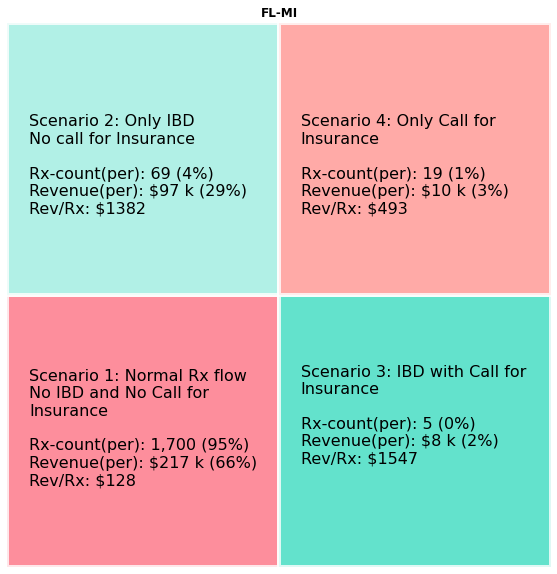

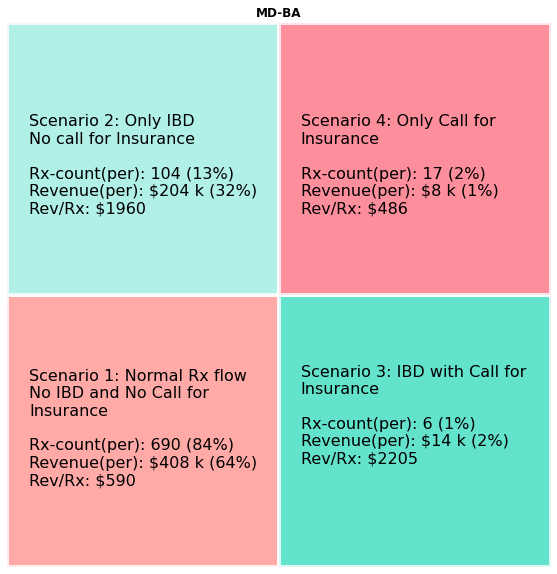

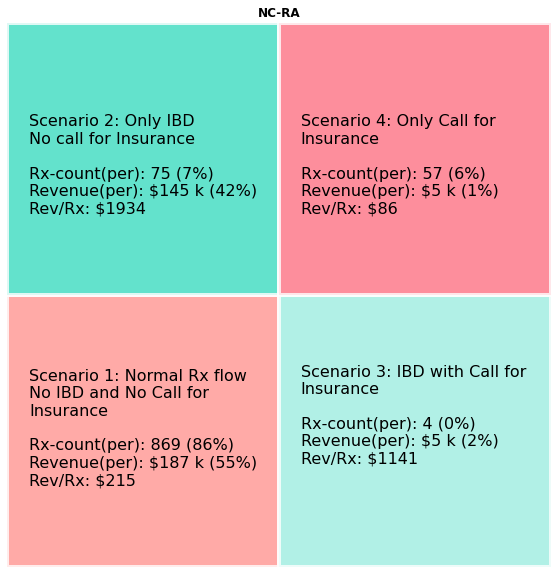

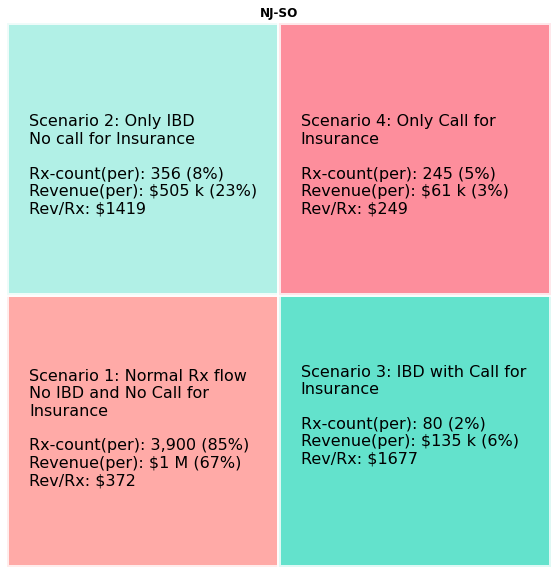

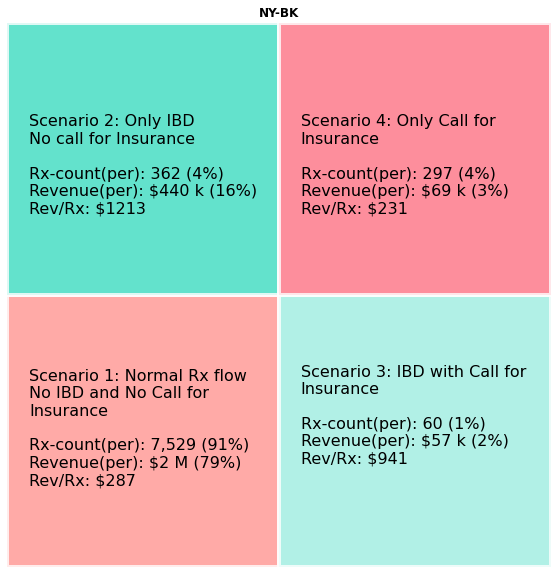

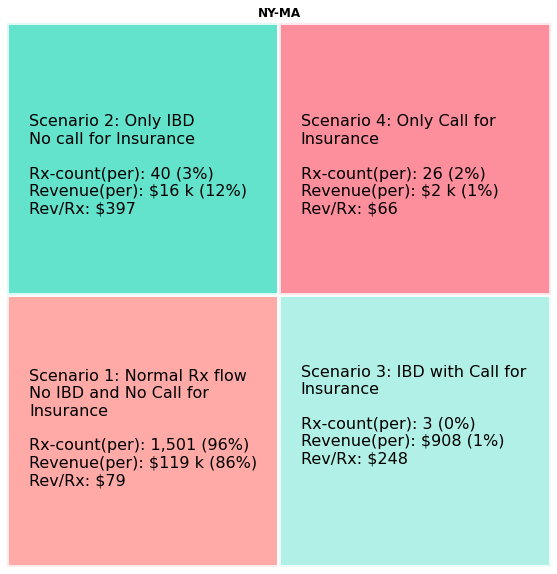

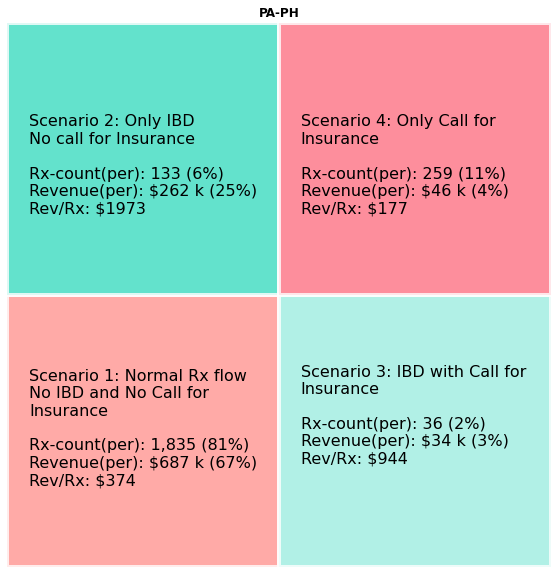

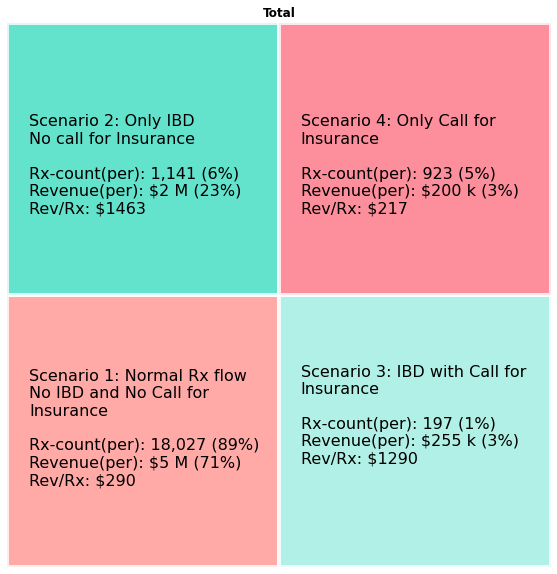

In [38]:
for i in final_df.pharmacy_loc:
    #print(i)
    loc_df = final_df[final_df['pharmacy_loc'] == i]
    for p,k in loc_df.iterrows():
        sizes = [50, 50, 50, 50]
        fig, ax = plt.subplots(figsize=(10,10))
        colors=k[-1:][0]
        ax = squarify.plot(
            sizes,
            norm_x=100,
            norm_y=100,
            #label=names,
            #color=k[-4:].values,
             color=colors,
            alpha=.8,
            edgecolor="white",
            linewidth=4)
        #'{:.0f}%'.format(height)

        a = ax.text(4,15, 'Scenario 1: Normal Rx flow \nNo IBD and No Call for \nInsurance\n\nRx-count(per): '+f'{int(k[1]):,}'+' ('+str(f'{round(k[17]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[2])+' ('+str(f'{round(k[13]*100,2):.0f}')+ '%)'
                            +'\nRev/Rx: $'+str(k[3]),
                            fontsize=16)

        a = ax.text(4, 65, 'Scenario 2: Only IBD \nNo call for Insurance\n\nRx-count(per): '+f'{int(k[4]):,}'+' ('+str(f'{round(k[18]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[5])+' ('+str(f'{round(k[14]*100,2):.0f}')+ '%)'
                            +'\nRev/Rx: $'+str(k[6]),
                            fontsize=16)


        a = ax.text(54, 19, 'Scenario 3: IBD with Call for \nInsurance\n\nRx-count(per): '+f'{int(k[7]):,}'+' ('+str(f'{round(k[19]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[8])+' ('+str(f'{round(k[15]*100,2):.0f}') + '%)'
                            +'\nRev/Rx: $'+str(k[9]),
                            fontsize=16)

        a = ax.text(54, 65, 'Scenario 4: Only Call for \nInsurance\n\nRx-count(per): '+f'{int(k[10]):,}'+' ('+str(f'{round(k[20]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[11])+' ('+str(f'{round(k[16]*100,2):.0f}') + '%)'
                            +'\nRev/Rx: $'+str(k[12]),
                            fontsize=16)
        ax.set_aspect('equal')
        plt.title(i,fontsize = font_size_title,fontweight=font_weight ,fontname = font_name,)
        plt.axis('off')
        
        plt.savefig(images_path+i+'_new.png',bbox_inches = 'tight',pad_inches = 0,dpi=300)
        plt.show()

In [39]:
pwd

'c:\\Users\\vidhi.mittal\\Documents\\Automation\\MBR_3\\OPS_MBR_Github\\ops_mbr\\RX\\image_generation\\New\\Slide_17_to_24'